<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-08 14:05:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  66.9MB/s    in 3.0s    

2025-06-08 14:05:08 (66.9 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 150.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 119.0 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 168.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 155.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 157.3 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [9]:
## Write your code here
query = """  
SELECT CompTotal 
FROM main
"""
df_comp = pd.read_sql_query(query, conn)
df_comp 

,CompTotal
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
65432,NaN
65433,NaN
65434,NaN
65435,NaN


In [10]:
df_comp.dtypes

CompTotal    float64
dtype: object

In [11]:
df_comp.isna().sum() 

CompTotal    31697
dtype: int64

In [12]:
df_comp.value_counts().head(5)

CompTotal
100000.0     939
60000.0      839
120000.0     793
80000.0      728
50000.0      705
Name: count, dtype: int64

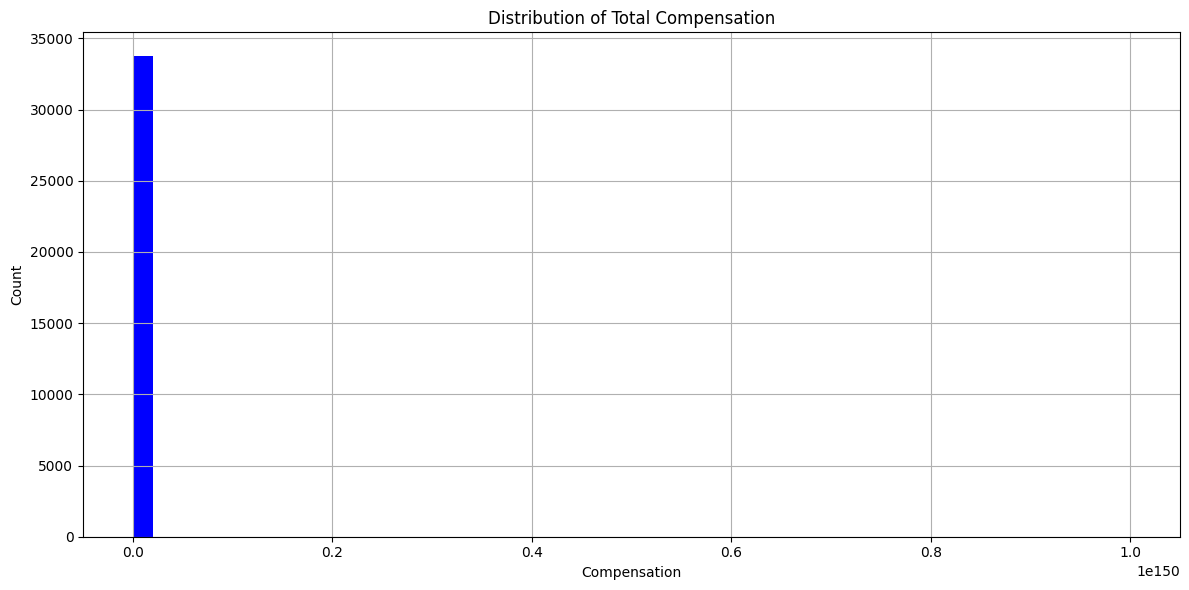

In [13]:
df_comp = df_comp.dropna()

plt.figure(figsize=(12,6))

plt.hist(df_comp, bins=50, color="blue")

plt.title("Distribution of Total Compensation")
plt.xlabel("Compensation")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()

plt.show() 

In [14]:
Q1 = df_comp["CompTotal"].quantile(0.25)
Q3 = df_comp["CompTotal"].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR 

df_comp_clean = df_comp[(df_comp["CompTotal"] <= upper_bound) 
                    & (df_comp["CompTotal"] >= lower_bound)]

df_comp_clean.head()

,CompTotal
374,28000.0
379,85000.0
385,50000.0
389,110000.0
392,126420.0


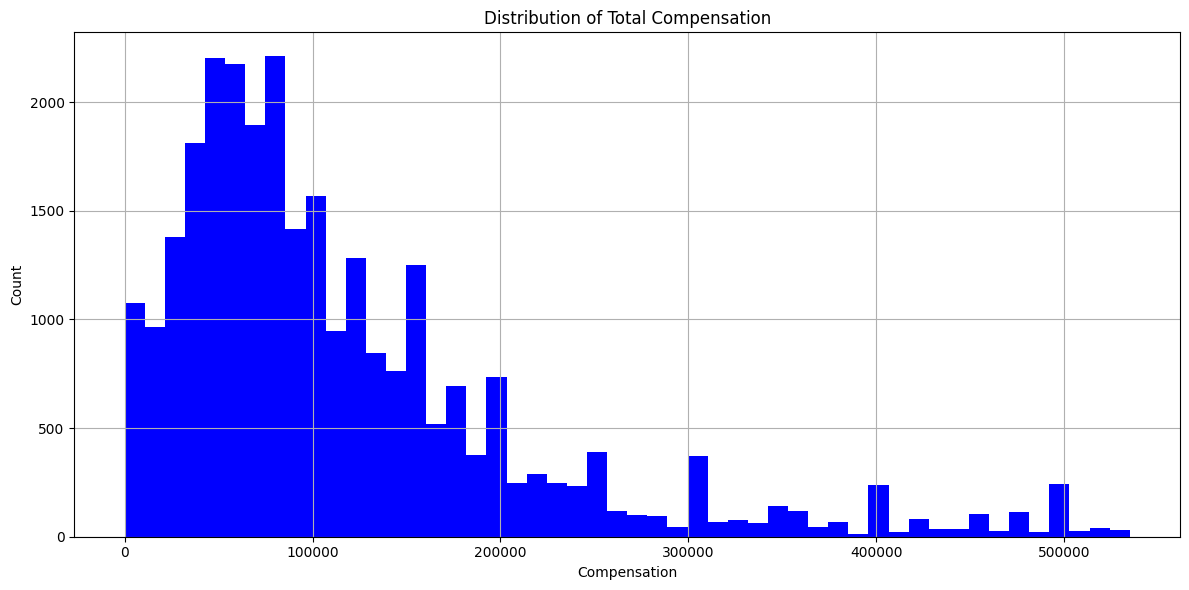

In [15]:

plt.figure(figsize=(12,6))

plt.hist(df_comp_clean, bins=50, color="blue")

plt.title("Distribution of Total Compensation")
plt.xlabel("Compensation")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()

plt.show() 

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [16]:
## Write your code here
query = """ 
SELECT YearsCodePro 
FROM main 
""" 

df_ycp = pd.read_sql_query(query, conn)
df_ycp.head() 

,YearsCodePro
0,None
1,17
2,27
3,None
4,None


In [17]:
df_ycp.isna().sum() 

YearsCodePro    13827
dtype: int64

In [18]:
df_ycp["YearsCodePro"].unique()

array([None, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [19]:
df_ycp.dropna() 

,YearsCodePro
1,17
2,27
6,7
9,11
11,25
...,...
65428,7
65431,24
65432,3
65434,5


In [17]:
df_ycp["YearsCodePro"] = df_ycp["YearsCodePro"].apply(lambda x: 0.5 if x == "Less than 1 year" else (51 if x == "More than 50 years" else x))

df_ycp["YearsCodePro"].unique()

array([None, '17', '27', '7', '11', '25', '12', '10', '3', 0.5, '18',
       '37', '15', '20', '6', '2', '16', '8', '14', '4', '45', '1', '24',
       '29', '5', '30', '26', '9', '33', '13', '35', '23', '22', '31',
       '19', '21', '28', '34', '32', '40', '50', '39', '44', '42', '41',
       '36', '38', 51, '43', '47', '48', '46', '49'], dtype=object)

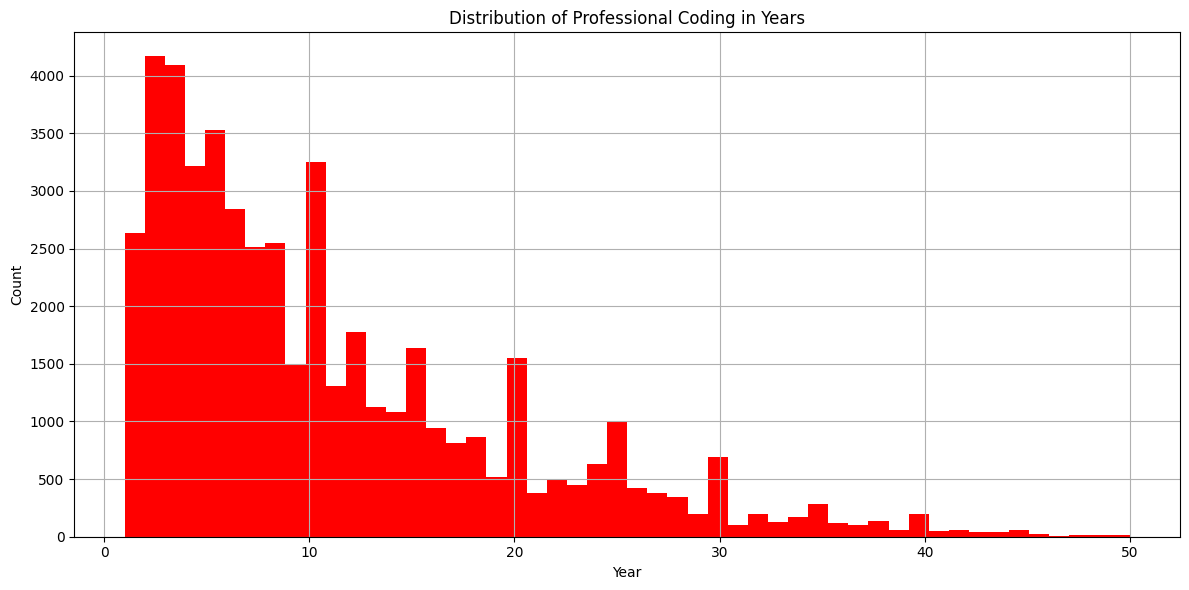

In [20]:
df_ycp["YearsCodePro"] = pd.to_numeric(df_ycp["YearsCodePro"], errors="coerce")

plt.figure(figsize=(12, 6)) 

plt.hist(df_ycp["YearsCodePro"], bins=50, color="red")
plt.title("Distribution of Professional Coding in Years")
plt.xlabel("Year")
plt.ylabel("Count") 
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [21]:
## Write your code here
query = """
SELECT CompTotal,Age 
FROM main 
WHERE CompTotal IS NOT NULL
ORDER BY Age 
""" 
df_compage = pd.read_sql_query(query, conn)
df_compage.head(10)

,CompTotal,Age
0,2040000.0,18-24 years old
1,50000.0,18-24 years old
2,1140000.0,18-24 years old
3,6000.0,18-24 years old
4,36000.0,18-24 years old
5,20000.0,18-24 years old
6,14000.0,18-24 years old
7,6600.0,18-24 years old
8,500000.0,18-24 years old
9,115000.0,18-24 years old


In [22]:
df_compage["CompTotal"] = df_compage["CompTotal"].dropna()
df_compage["Age"].value_counts()

Age
25-34 years old       14657
35-44 years old        9352
18-24 years old        4636
45-54 years old        3516
55-64 years old        1279
65 years or older       196
Under 18 years old       90
Prefer not to say        14
Name: count, dtype: int64

In [23]:
Q1 = df_compage["CompTotal"].quantile(0.25)
Q3 = df_compage["CompTotal"].quantile(0.75)

IQR = Q3 - Q1 

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR 

df_trimmed = df_compage[(df_compage["CompTotal"] <= upper_bound) & 
                           (df_compage["CompTotal"] >= lower_bound)] 

df_trimmed.groupby("Age")[["Age","CompTotal"]].head() 


,Age,CompTotal
1,18-24 years old,50000.0
3,18-24 years old,6000.0
4,18-24 years old,36000.0
5,18-24 years old,20000.0
6,18-24 years old,14000.0
4636,25-34 years old,28000.0
4637,25-34 years old,110000.0
4638,25-34 years old,27000.0
4639,25-34 years old,62000.0
4640,25-34 years old,230000.0


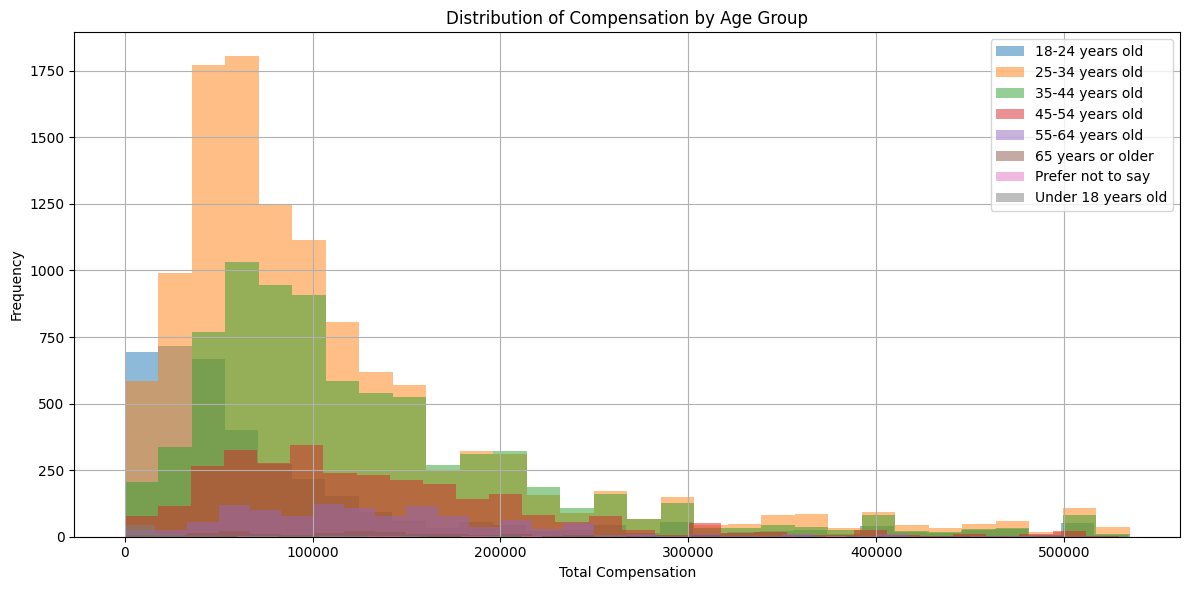

In [24]:
plt.figure(figsize=(12, 6))
for age_group in df_trimmed["Age"].unique():
    subset = df_trimmed[df_trimmed["Age"] == age_group]
    plt.hist(subset["CompTotal"], bins=30, alpha = 0.5, label=age_group)

plt.title("Distribution of Compensation by Age Group")
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.legend(loc="upper right")

plt.show() 

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [25]:
query = """ 
SELECT TimeSearching, Age
FROM main
WHERE TimeSearching IS NOT NULL
ORDER BY Age
"""

df_tsba = pd.read_sql_query(query, conn)  
df_tsba.head(5)

,TimeSearching,Age
0,30-60 minutes a day,18-24 years old
1,30-60 minutes a day,18-24 years old
2,15-30 minutes a day,18-24 years old
3,60-120 minutes a day,18-24 years old
4,15-30 minutes a day,18-24 years old


In [26]:
df_tsba["TimeSearching"].isna().sum() 

np.int64(0)

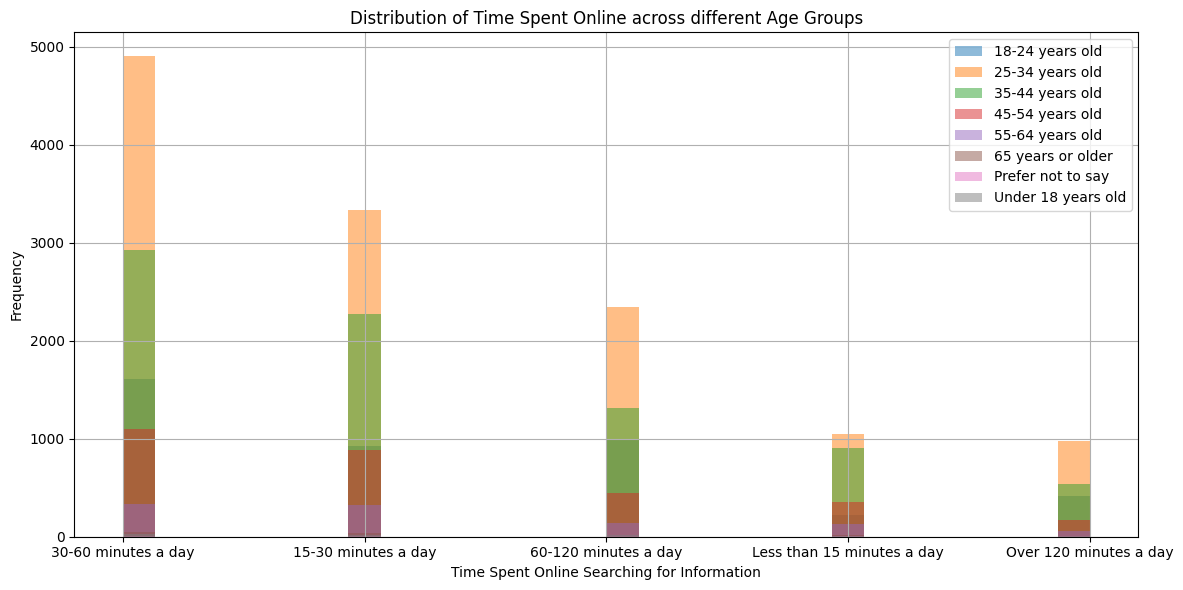

In [27]:
plt.figure(figsize=(12,6))

for age_group in df_tsba["Age"].unique():
    subset = df_tsba[df_tsba['Age']==age_group]
    plt.hist(subset["TimeSearching"], bins=30, alpha=0.5, label = age_group)        

plt.title("Distribution of Time Spent Online across different Age Groups")
plt.xlabel("Time Spent Online Searching for Information")
plt.ylabel("Frequency") 
plt.grid(True)
plt.legend() 
plt.tight_layout() 
plt.show() 

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [28]:
## Write your code here
query = """  
SELECT DatabaseWantToWorkWith  
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL 
""" 

df_dbase = pd.read_sql_query(query, conn)
df_dbase.head() 

,DatabaseWantToWorkWith
0,PostgreSQL
1,Firebase Realtime Database
2,MongoDB;MySQL;PostgreSQL
3,PostgreSQL;SQLite
4,Cloud Firestore


In [29]:
df_dbase["DatabaseWantToWorkWith"] = df_dbase["DatabaseWantToWorkWith"].str.split(";")
df_dbase = df_dbase.explode("DatabaseWantToWorkWith") 
df_dbase["DatabaseWantToWorkWith"] = df_dbase["DatabaseWantToWorkWith"].str.strip()
top5_dbase = df_dbase["DatabaseWantToWorkWith"].value_counts().head(5)

In [30]:
top5_dbase.head()

DatabaseWantToWorkWith
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64

/tmp/ipykernel_307/2319646912.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


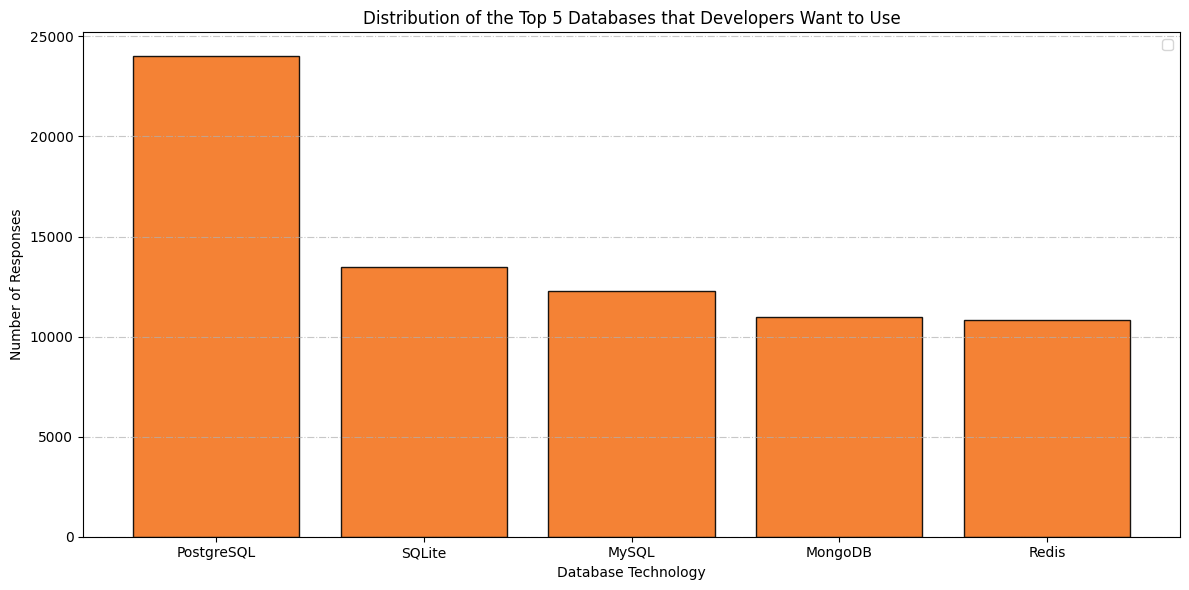

In [31]:
plt.figure(figsize=(12,6))

plt.bar(top5_dbase.index, top5_dbase.values, color="#F3741F", edgecolor="black", alpha=0.9) 

plt.title("Distribution of the Top 5 Databases that Developers Want to Use")
plt.xlabel("Database Technology")
plt.ylabel("Number of Responses")
plt.grid(axis='y', linestyle="dashdot", alpha=0.7)
plt.legend() 
plt.tight_layout() 

plt.show() 

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [32]:
## Write your code here
query = """ 
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
""" 

df_rw = pd.read_sql_query(query, conn)
df_rw["RemoteWork"].unique()

array(['Remote', 'In-person', 'Hybrid (some remote, some in-person)'],
      dtype=object)

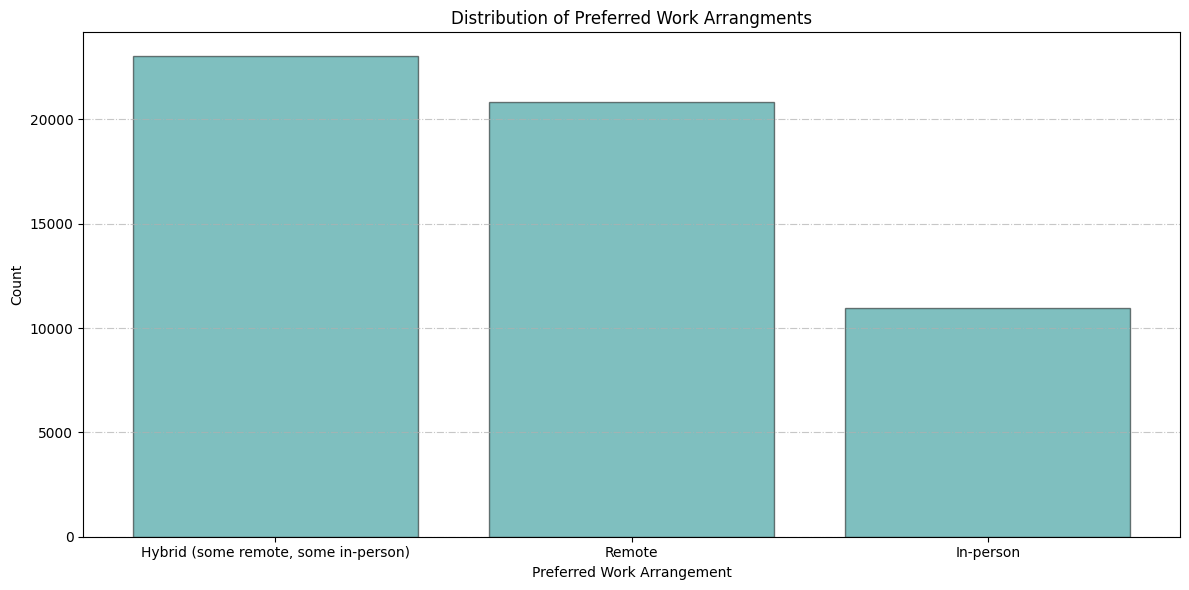

In [33]:
remwork_count = df_rw["RemoteWork"].value_counts()

plt.figure(figsize=(12,6))

plt.bar(remwork_count.index, remwork_count.values, color="teal", edgecolor="black", alpha=0.5)

plt.title("Distribution of Preferred Work Arrangments")
plt.xlabel("Preferred Work Arrangement")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="dashdot", alpha=0.7)
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


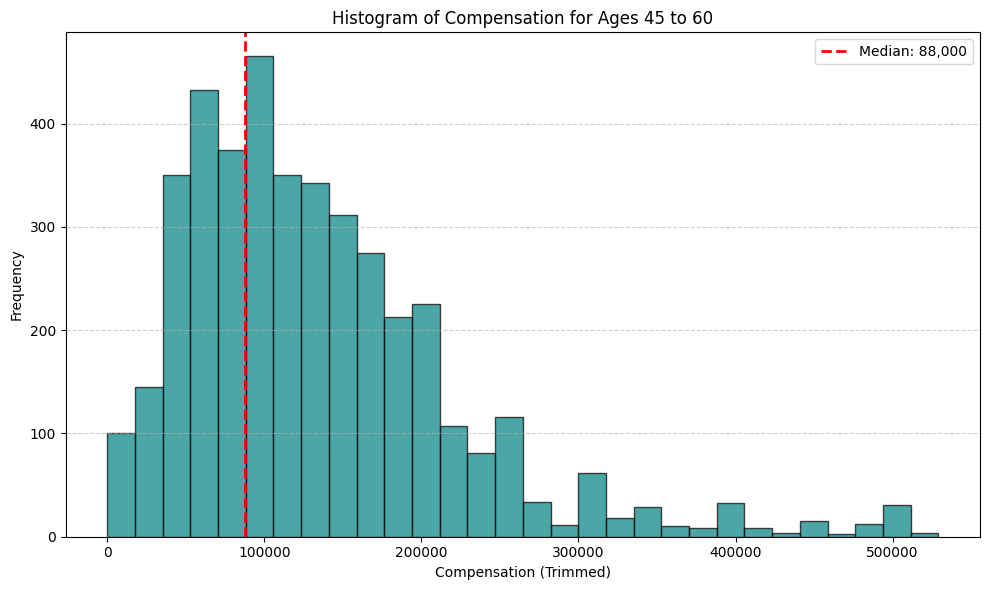

In [34]:
#comptotal cleaned:
age_filter = ["45-54 years old", "55-64 years old"]
df_age_filtered = df_trimmed[df_trimmed["Age"].isin(age_filter)]

median_comp = df_trimmed["CompTotal"].median()

plt.figure(figsize=(10, 6))

plt.hist(df_age_filtered["CompTotal"], bins=30, color="teal", edgecolor="black", alpha=0.7)
plt.axvline(median_comp, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_comp:,.0f}')

plt.title("Histogram of Compensation for Ages 45 to 60")
plt.xlabel("Compensation (Trimmed)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="dashed", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [51]:
## Write your code here
query = """ 
SELECT JobSat, YearsCodePro
FROM main
"""

js_ycp = pd.read_sql_query(query, conn) 
js_ycp.head() 

,JobSat,YearsCodePro
0,NaN,None
1,NaN,17
2,NaN,27
3,NaN,None
4,NaN,None


In [52]:
js_ycp = js_ycp.dropna(subset=["JobSat", "YearsCodePro"]) 
js_ycp[["JobSat", "YearsCodePro"]].isna().sum()

JobSat          0
YearsCodePro    0
dtype: int64

In [53]:
js_ycp["YearsCodePro"].unique()

array(['12', '27', '10', 'Less than 1 year', '18', '15', '17', '6', '7',
       '16', '14', '4', '8', '2', '29', '5', '30', '1', '25', '24', '26',
       '9', '20', '37', '11', '3', '13', '19', '21', '23', '34', '28',
       '32', '22', '33', '40', '39', '31', '35', '41', '38',
       'More than 50 years', '36', '43', '42', '50', '45', '44', '46',
       '48', '47', '49'], dtype=object)

In [59]:
js_ycp["YearsCodePro"] = js_ycp["YearsCodePro"].apply(lambda x: 0.5 if x=="Less than 1 year" else (51 if x == "More than 50 years" else x))
js_ycp["YearsCodePro"] = pd.to_numeric(js_ycp["YearsCodePro"], errors="coerce")
js_ycp["YearsCodePro"].unique() 

array([12. , 27. , 10. ,  0.5, 18. , 15. , 17. ,  6. ,  7. , 16. , 14. ,
        4. ,  8. ,  2. , 29. ,  5. , 30. ,  1. , 25. , 24. , 26. ,  9. ,
       20. , 37. , 11. ,  3. , 13. , 19. , 21. , 23. , 34. , 28. , 32. ,
       22. , 33. , 40. , 39. , 31. , 35. , 41. , 38. , 51. , 36. , 43. ,
       42. , 50. , 45. , 44. , 46. , 48. , 47. , 49. ])

In [ ]:
plt.figure(figsize=(10,6))

plt.hist()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
